In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 회귀분석
from statsmodels.formula.api import ols
import statsmodels.api as sm

# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot,add_constant

# 선형모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf

# 선형회귀모형
from sklearn.linear_model import LinearRegression

# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

# 평가함수
from statsmodels.tools.eval_measures import rmse

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

# jupyter notebook 사용시 그래프 자동 출력 옵션
%matplotlib inline

In [2]:
#파일명, 변수, 값 등에 한글 포함시 engine=python 지정
df_raw = pd.read_csv("체질검사.csv",engine='python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    float64
 3   HEIGHT   252 non-null    float64
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


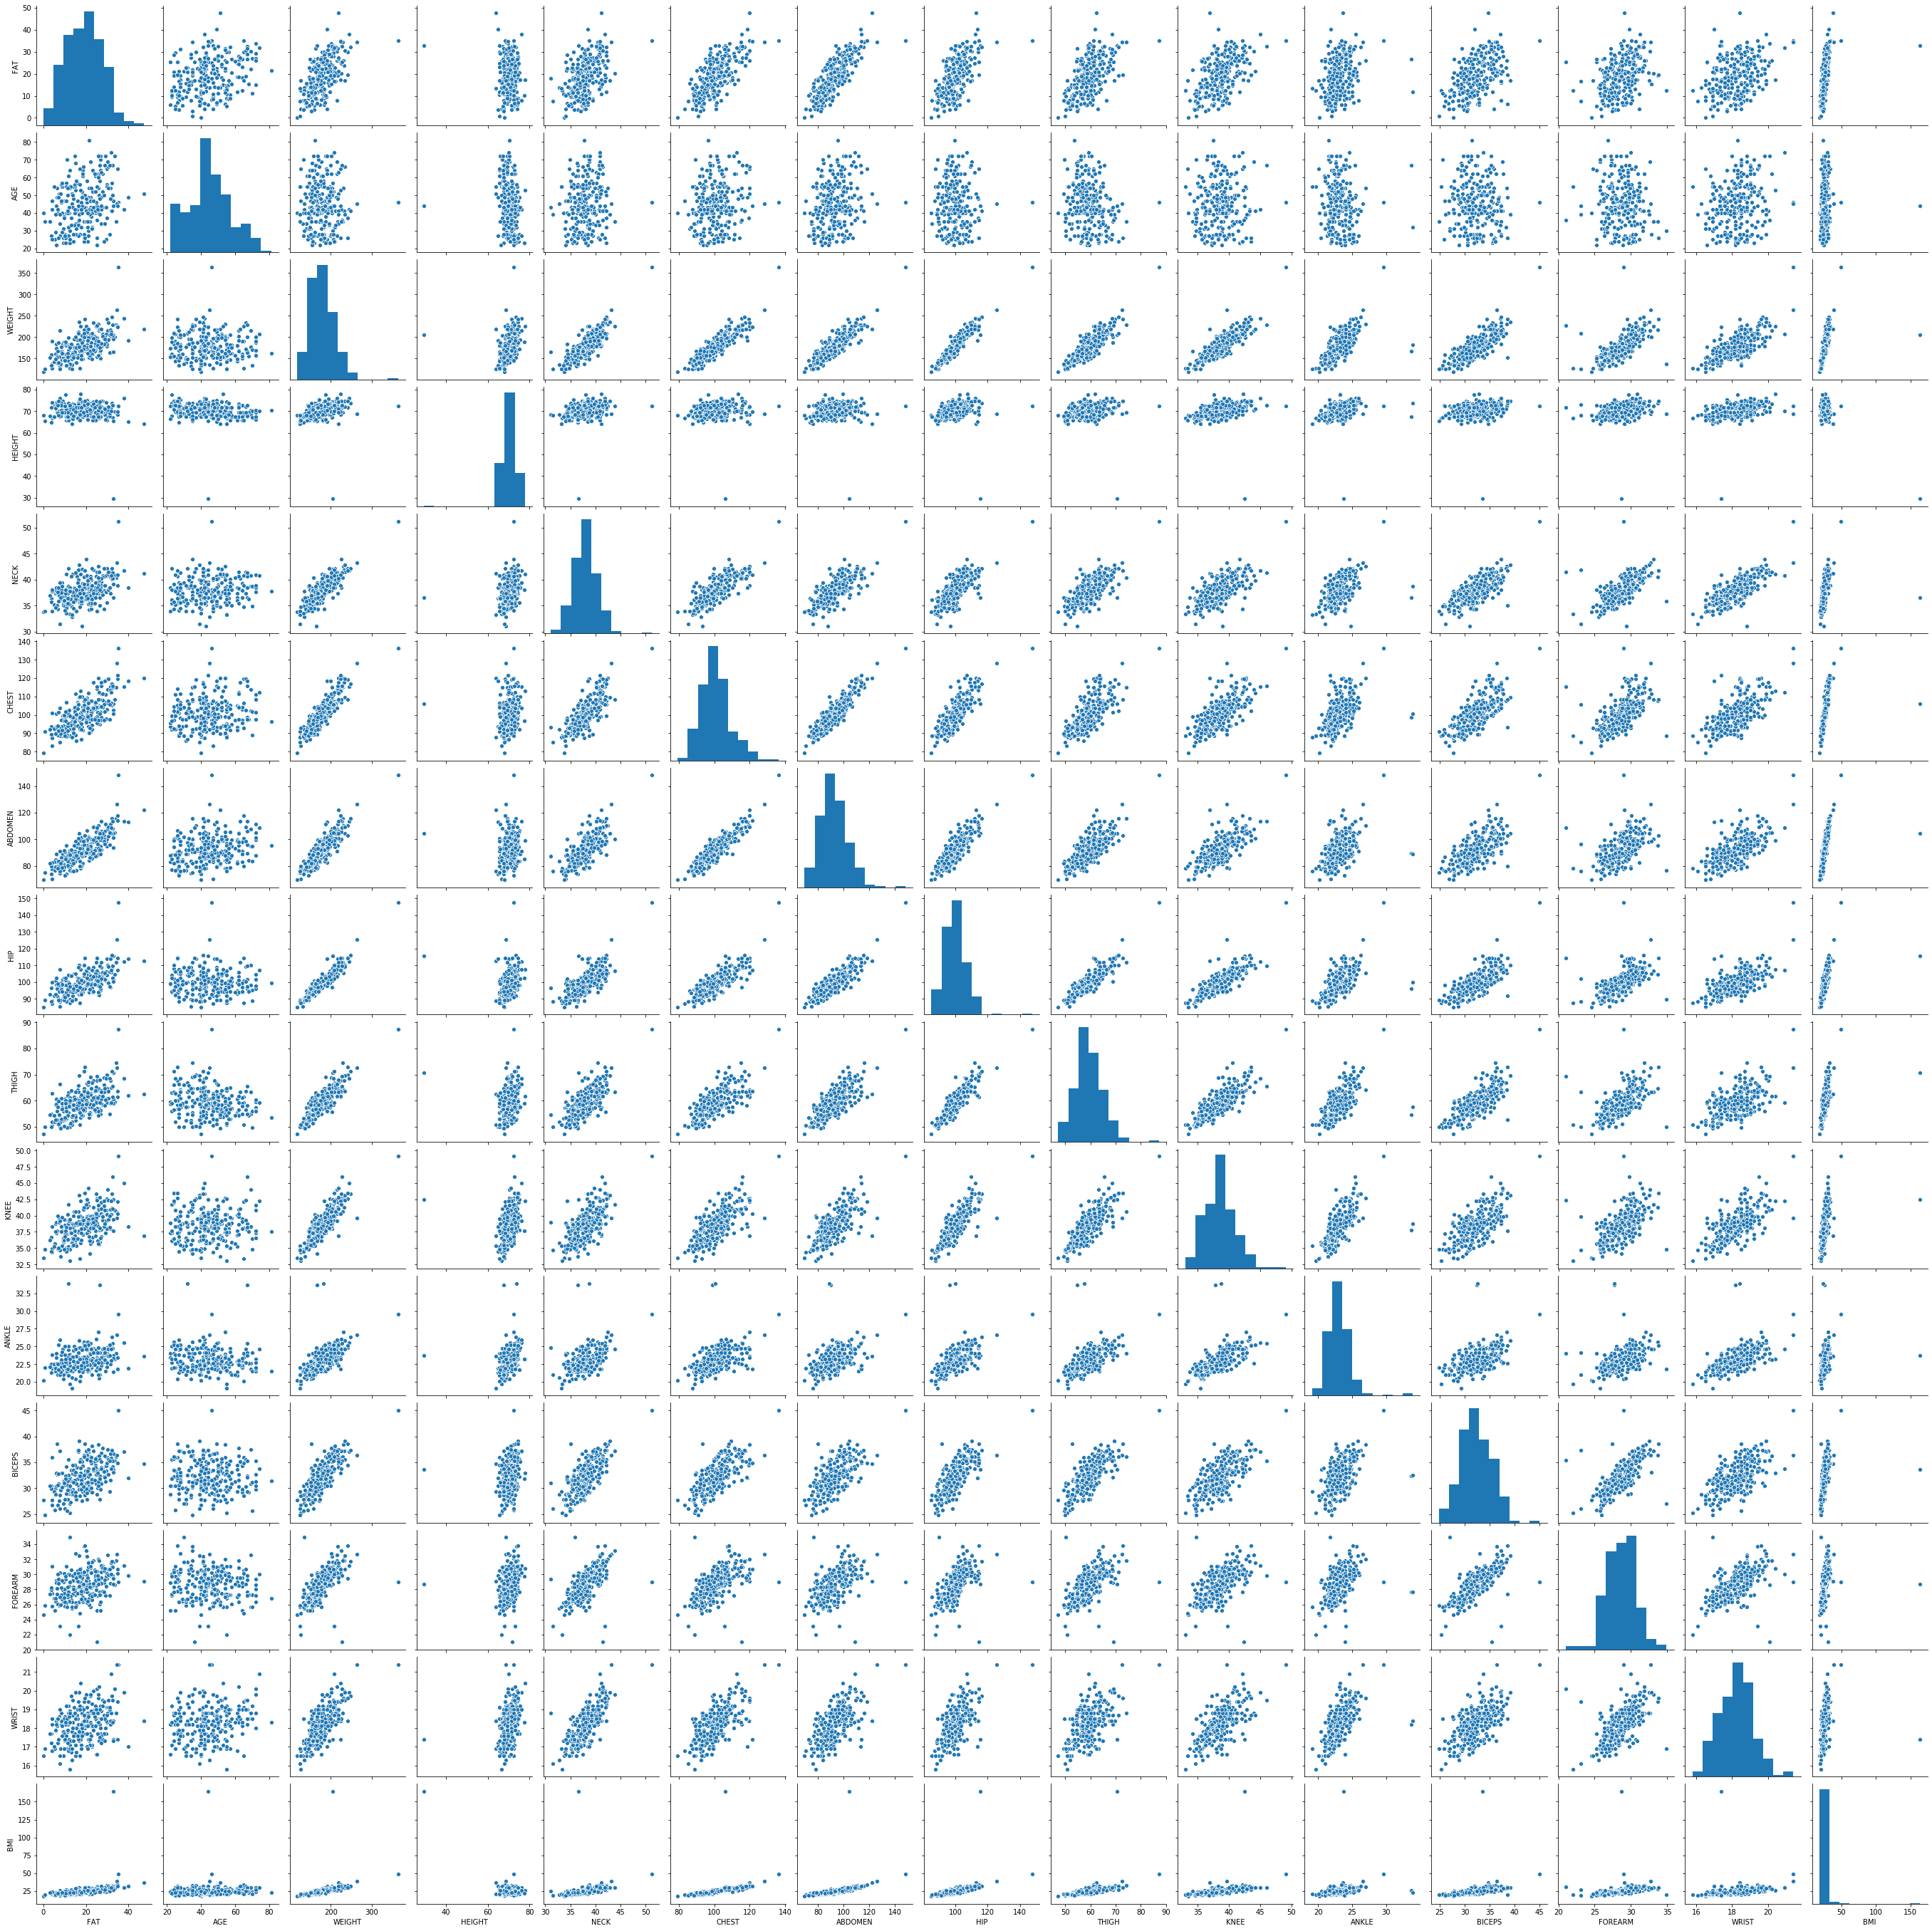

In [30]:
#산점도 행렬: 전체 숫자형 변수
sns.pairplot(df_raw)

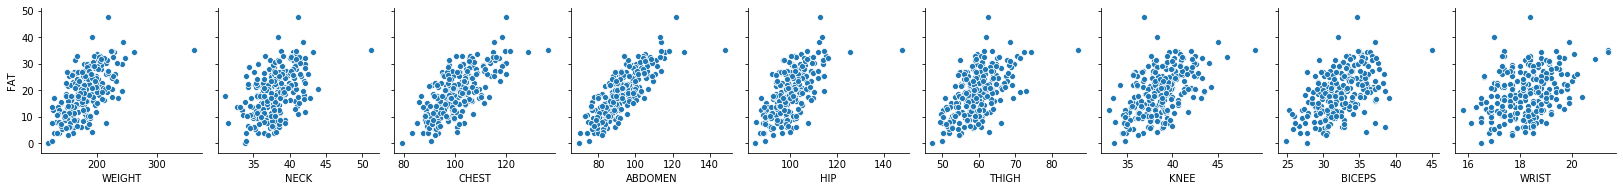

In [4]:
#산점도 행렬:목표변수(체질 비만도)와 설명변수 지정.kind="scatter"|"reg"
sns.pairplot(df_raw, y_vars="FAT",x_vars=["WEIGHT","NECK","CHEST","ABDOMEN","HIP",
                                         "THIGH","KNEE","BICEPS","WRIST"],
            kind = "scatter")

In [5]:
#다중 상관관계 분석
df_raw.corr().round(3) 
#몸무게와 NECK, CHEST, ABDOMEN, HIP, THIGH, KNEE, BICEPS, WRIST의 상관성이 높아보임

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


In [6]:
# 유관 변수를 활용해 새로운 BMI 파생변수 생성
df_raw['BMI'] = df_raw['WEIGHT']*0.45 / (df_raw['HEIGHT']*2.54/100) ** 2

In [7]:
df_raw

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9,29.537049
248,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8,26.139558
249,20.9,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9,26.060228
250,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0,24.935981


In [9]:
#다중 상관관계 분석
df_raw.corr().round(3) 
#몸무게와 NECK, CHEST, ABDOMEN, HIP, THIGH, KNEE, BICEPS, WRIST의 상관성이 높아보임

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364


In [10]:
#선형 회귀 분석:formula(y~X1+X2+...) 이용, 상수항(intercept)자동추가
reg_model = smf.ols(formula="FAT~BMI+AGE+WEIGHT+HEIGHT+NECK+ CHEST + ABDOMEN  + HIP  + THIGH  + KNEE  + ANKLE  + BICEPS  + FOREARM  + WRIST", data=df_raw)
#모델 생성(적합)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     50.56
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           5.49e-63
Time:                        22:17:59   Log-Likelihood:                -718.19
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     237   BIC:                             1519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.2460     24.500     -0.990      0.3

In [11]:
#설명변수 간의 다중공선성 확인: 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop("FAT", axis =1)

#statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

#DataFrame으로 지정
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values,i)
                for i in range(df_raw_x_const.shape[1])]
#VIF 정렬 적은거부터 큰 순서로
df_vif.sort_values('VIF', inplace = True)
df_vif.round(3)

,variable,VIF
10,ANKLE,1.922
12,FOREARM,2.196
1,AGE,2.251
13,WRIST,3.378
11,BICEPS,3.674
4,NECK,4.456
9,KNEE,4.815
14,BMI,7.432
8,THIGH,8.010
3,HEIGHT,9.146


In [56]:
몸무게의 VIF 33.509, 엉덩이 둘레 14.8로 높게 나타남. 변수 특성, 영향을 고려하여 모델에서 제외 검토

SyntaxError: invalid syntax (<ipython-input-56-650a7a35451d>, line 1)

In [12]:
# 다중공선성 높은 변수 제거 후 공선성 재확인
df_raw_x = df_raw.drop(['FAT','WEIGHT'],axis=1)

#statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

#DataFrame으로 지정
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values,i)
              for i in range(df_raw_x_const.shape[1])]
#VIF 정렬
df_vif.sort_values('VIF', inplace = True)
df_vif.round(3)

,variable,VIF
9,ANKLE,1.847
11,FOREARM,2.196
1,AGE,2.196
12,WRIST,3.327
10,BICEPS,3.507
3,NECK,3.962
2,HEIGHT,4.665
13,BMI,4.729
8,KNEE,4.788
7,THIGH,7.837


In [13]:
#선형 회귀 분석:formula(y~X1+X2+...) 이용,WEIGHT제외, 상수항(intercept)자동추가
reg_model = smf.ols(formula="FAT~BMI+AGE+HEIGHT+NECK+ CHEST + ABDOMEN  + HIP  + THIGH  + KNEE  + ANKLE  + BICEPS  + FOREARM  + WRIST", data=df_raw)
#모델 생성(적합)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     53.97
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           2.29e-63
Time:                        22:18:06   Log-Likelihood:                -719.42
No. Observations:                 252   AIC:                             1467.
Df Residuals:                     238   BIC:                             1516.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6651      8.839      1.207      0.2

## 후진제거법

In [14]:
# RFE(Recursive Feature Elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표 변수 분리
df_raw_y = df_raw['FAT']

# sklearn의 선형회귀 모델
model = LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
# rfe = RFE(model,5)
# rfe = rfe.fit(df_x, df_y)
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_raw_x, df_raw_y)

# 선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables :{}".format(selected_cols))
print("Removed Variables :{}".format(removed_cols))

Selected Variables :Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables :Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'BMI'], dtype='object')


In [37]:
# 선택된 5개 변수를 넣고 모델 생성
reg_model = smf.ols(formula="FAT~NECK+ ABDOMEN  + HIP  + FOREARM  + WRIST", data=df_raw)

#모델 생성(적합)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           4.38e-68
Time:                        22:32:34   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

In [38]:
# 후진 제거법에 의해 제거된 요소를 확인하기 위해
# 다중공선성 재진단

# 후진제거법에 의하여 선택된 데이터
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)

# 다중공선성 저장
df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_raw_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_raw_x_rfe_const.values,i) for i in range(df_raw_x_rfe_const.shape[1])]
df_rfe_vif.sort_values('VIF',inplace =True)
df_rfe_vif.round(3)

,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


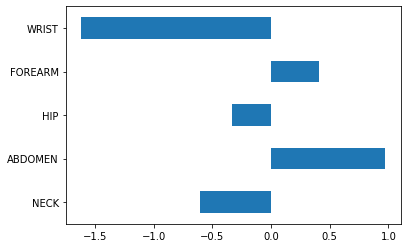

In [39]:
#변수 중요도 확인:비표준화 회귀계수 기준
# 결론 도출, 설명변수 중요도(표준화 적용 이전) -> 표준화 회귀계수 산출해야함
df_reg_coef = pd.DataFrame({"Coef":reg_result.params.values[1:]},index = selected_cols)
df_reg_coef.plot.barh(y= "Coef", legend=False)

In [42]:
#설명변수 표준화 적용 -> 표준화 회귀계수 산출 목적
scaler = StandardScaler()
#Scale 변환대상 변수: 일반적으로 설명변수
cols = df_raw_x.columns

#Scale 변환
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

#목표변수 추가
df_scaled['FAT'] = df_raw['FAT']
reg_model_scaled = smf.ols(formula = "FAT~+NECK+ ABDOMEN  + HIP  + FOREARM  + WRIST",
                         data = df_scaled)

reg_result_scaled = reg_model_scaled.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           4.38e-68
Time:                        22:33:19   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

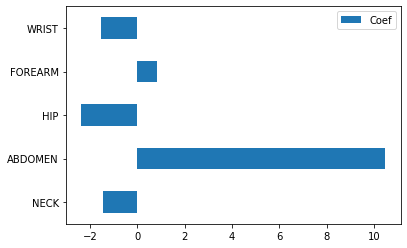

In [43]:
#설명변수 중요도(표준화후)
df_reg_scaled_coef = pd.DataFrame({'Coef':reg_result_scaled.params.values[1:]},
                                 index = selected_cols)
df_reg_scaled_coef.plot.barh(y="Coef", legend = True)

# 결론: 표준화 이후 ABDOMEN 가장 중요하고 HIP과 FOREARM의 중요도는 줄어들었다. 다른 3개의 변수들도 중요도가 증가하였다.

# 2. 의사결정나무

In [1]:
#데이터 구성:Series, DataFrame
import pandas as pd

#데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

#export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

#graphviz: 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

#데이터 분할:train, test
from sklearn.model_selection import train_test_split

#예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor

#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('Concrete.csv', engine='python',encoding='cp949')
df

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
# 목표변수, 설명변수 데이터 지정
df_y = df['CONCRETE_COMPRESSIVE_STRENGTH']
df_x = df.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis=1, inplace=False)

In [4]:
#train, test데이터 7:3 비율로 분할

df_train_x,df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y \
                                                              ,test_size = 0.3, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data X size : {}'.format(df_test_y.shape))

train data X size : (721, 8)
train data Y size : (721,)
test data X size : (309, 8)
test data X size : (309,)


In [5]:
#train데이터, train(0.4)와 validation(0.3)

df_train_x,df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y \
                                                              ,test_size = 3/7, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_validation_x.shape))
print('validation data X size : {}'.format(df_validation_y.shape))

train data X size : (412, 8)
train data Y size : (412,)
validation data X size : (309, 8)
validation data X size : (309,)


In [6]:
#위의 절차를 통해 train(0.4) : validation(0.3) : test(0.3) 의 비율로 분할
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_validation_x.shape))
print('validation data X size : {}'.format(df_validation_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data X size : {}'.format(df_test_y.shape))

train data X size : (412, 8)
train data Y size : (412,)
validation data X size : (309, 8)
validation data X size : (309,)
test data X size : (309, 8)
test data X size : (309,)


In [7]:
# 모델 생성
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print('Score on training set :{:.3f}'.format(tree_uncustomized.score(df_train_x,\
                                                                    df_train_y)))

# Validation 데이터 설명력
print('Score on validation set :{:.3f}'.format(tree_uncustomized.score(df_validation_x,\
                                                                    df_validation_y)))

# Test 데이터 설명력
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x, \
                                                               df_test_y)))

Score on training set :1.000
Score on validation set :0.685
Score on test set:0.705


In [8]:
tree_uncustomized

DecisionTreeRegressor(random_state=1234)

In [9]:
#train, validation, test 설명력 결과 저장
train_score = []; validation_score=[]

#min_samples_leaf: 잎사귀 최소 자료수 *참조:para_leaf: [1,2,3,...,19]
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]
for v_min_samples_leaf in para_leaf:
    
    tree = DecisionTreeRegressor(random_state=1234,
                              min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_validation_x, df_validation_y))
    
#결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = validation_score

In [10]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidationScore
0,1,1.000,0.685
1,2,0.984,0.688
2,3,0.962,0.688
3,4,0.948,0.718
4,5,0.918,0.681
5,6,0.908,0.678
6,7,0.889,0.679
7,8,0.876,0.671
8,9,0.862,0.659
9,10,0.857,0.663


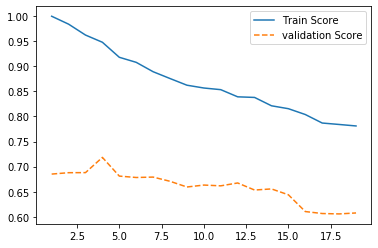

In [11]:
#모델 설명력에 대한 그래프 확인->4을 선택
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, validation_score, linestyle="--", label="validation Score")
plt.legend()

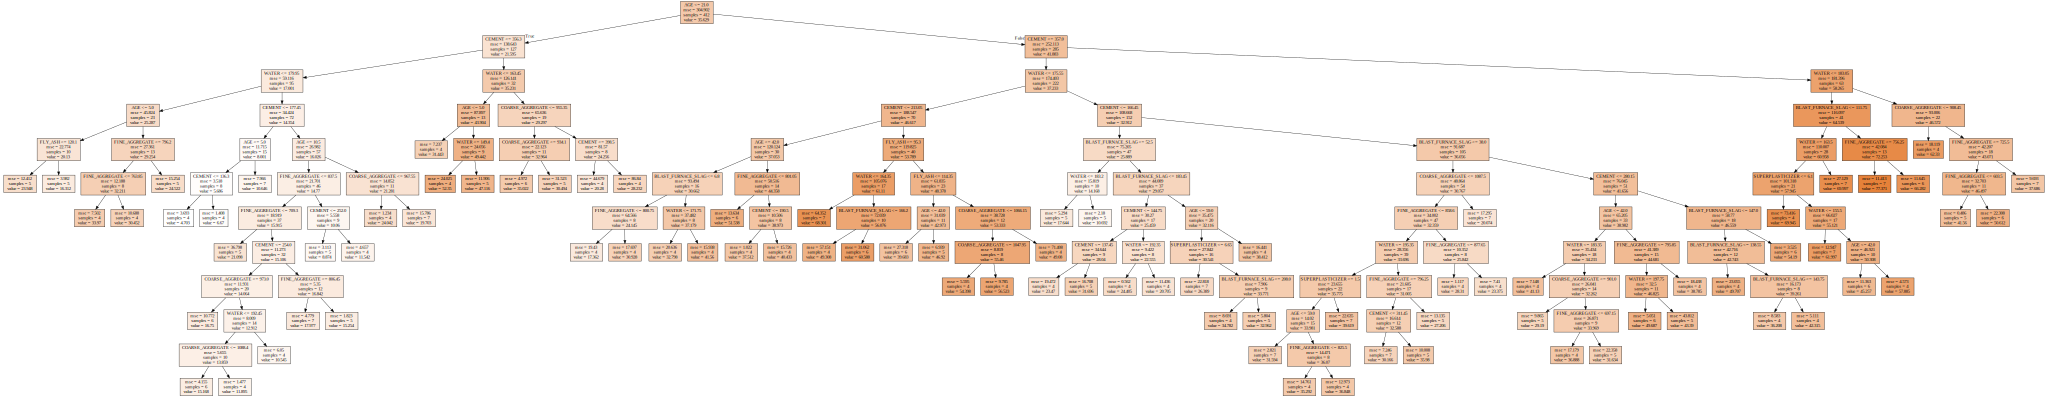

In [12]:
v_feature_name = df_train_x.columns

#잎사귀 노드의 최소 자료수 = 4 모델
tree_graph = DecisionTreeRegressor(min_samples_leaf = 4, random_state=1234)
tree_graph.fit(df_train_x, df_train_y)

#Tree 구조 생성 및 저장: 모델 시각화
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names=v_feature_name, impurity = True, filled=True)
with open("tree_leaf.dot") as f:
   dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [13]:
#train 및 test 설명력 결과 저장
train_score = []; validation_score=[]

#min_samples_leaf: 잎사귀 최소 자료 수  *참조: para_leaf:[4,6,8,...]
para_split=[n_split*2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 4,
                                min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_validation_x, df_validation_y))
   
#결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplessplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = validation_score

df_score_split.round(3)

,MinSamplessplit,TrainScore,ValidationScore
0,4,0.948,0.718
1,6,0.948,0.718
2,8,0.948,0.718
3,10,0.939,0.712
4,12,0.926,0.700
5,14,0.910,0.703
6,16,0.902,0.693
7,18,0.884,0.680
8,20,0.873,0.660
9,22,0.865,0.665


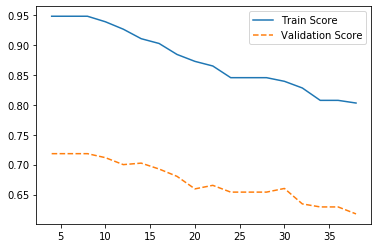

In [14]:
plt.plot(para_split, train_score, linestyle="-", label='Train Score')
plt.plot(para_split, validation_score, linestyle="--", label='Validation Score')
plt.legend()

In [15]:
train_score = []; validation_score = []

para_depth = [depth for depth in range(2,20)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf= 4, min_samples_split = 8, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_validation_x, df_validation_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth["DEPTH"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["ValidationScore"] = validation_score
df_score_depth.round(3)


,DEPTH,TrainScore,ValidationScore
0,2,0.524,0.400
1,3,0.662,0.482
2,4,0.766,0.586
3,5,0.848,0.635
4,6,0.895,0.667
5,7,0.926,0.696
6,8,0.941,0.712
7,9,0.946,0.700
8,10,0.948,0.719
9,11,0.948,0.718


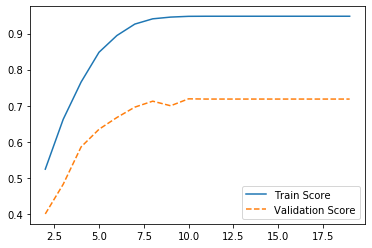

In [16]:
plt.plot(para_depth, train_score, linestyle="-", label = "Train Score")
plt.plot(para_depth, validation_score, linestyle="--", label = "Validation Score")
plt.legend()

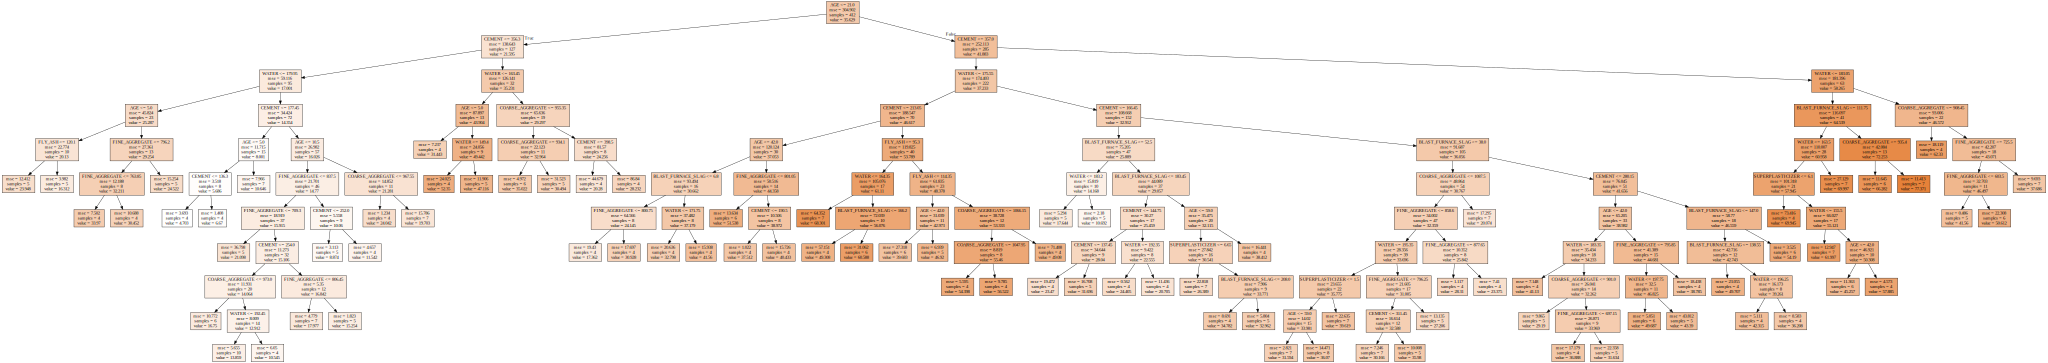

In [17]:
v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=4, min_samples_split=8, max_depth=10)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file= "tree_leaf.dot",
               feature_names=v_feature_name, impurity = True, filled= True)

with open("tree_leaf.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [18]:
tree_final = DecisionTreeRegressor(random_state=1234, min_samples_leaf=4, min_samples_split=8, max_depth=10)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=8,
                      random_state=1234)

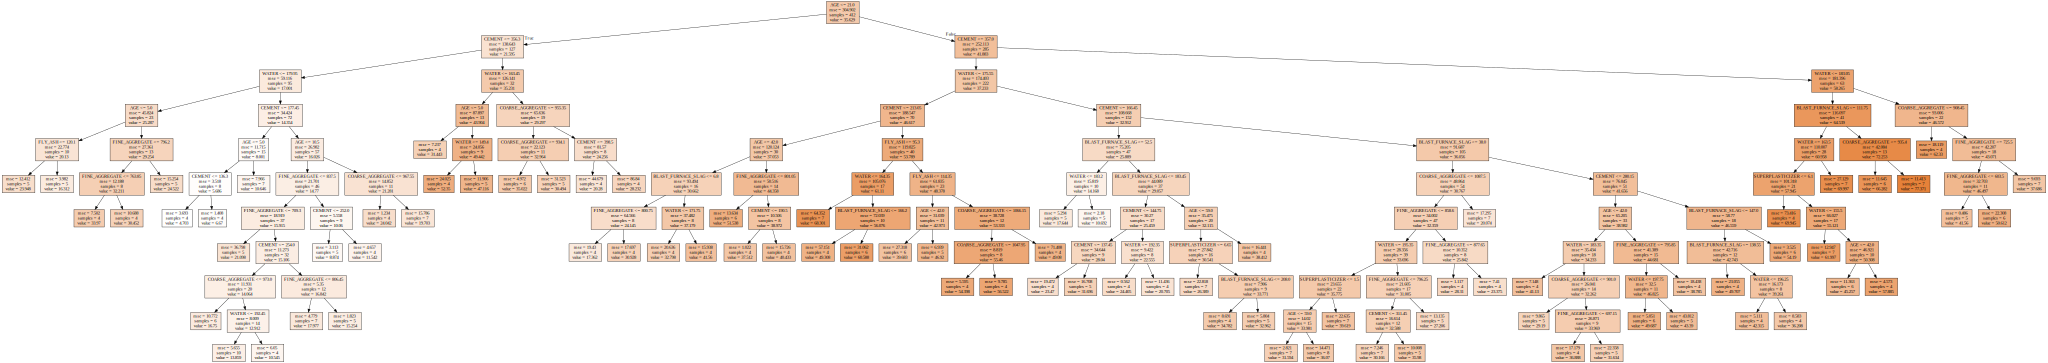

In [19]:
export_graphviz(tree_final, out_file= "tree_final.dot",
               feature_names=v_feature_name, impurity = True, filled= True)

with open("tree_final.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [20]:
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on test set: 0.761


In [21]:
#결론 도출
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.345
0,CEMENT,0.335
3,WATER,0.171
1,BLAST_FURNACE_SLAG,0.069
5,COARSE_AGGREGATE,0.027
6,FINE_AGGREGATE,0.024
2,FLY_ASH,0.020
4,SUPERPLASTICIZER,0.009


Text(0, 0.5, '변수')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Runtim

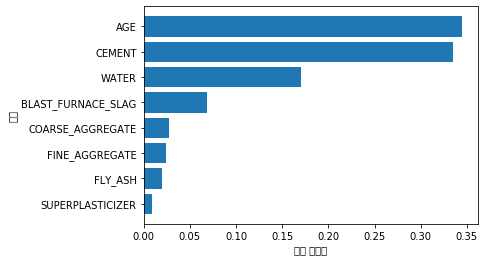

In [22]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")


In [ ]:
# estimator = DecisionTreeRegressor()

# param_grid = {"criterion":["mse", "friedman_mse", "mae"], "max_features":["auto", "sqrt","log2"],
#              "max_depth":para_depth, "min_samples_split":para_split,
#              "min_samples_leaf":para_leaf}

# grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
# grid_dt.fit(df_train_x, df_train_y)

# print("best estimator model: \n {}".format(grid_dt.best_estimator_))
# print("\nbest parameter: \n {}".format(grid_dt.best_params_))
# print("best score: \n {}".format(grid_dt.best_score_.round(3)))


In [23]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

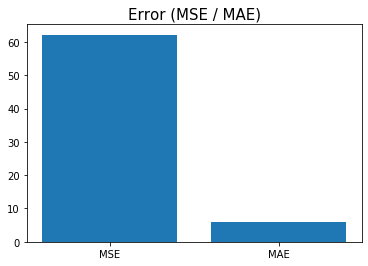

In [24]:
models = ['MSE','MAE']

evalresult = []

dt_y_pred = tree_final.predict(df_test_x)

evalresult.append(mean_squared_error(df_test_y, dt_y_pred))
evalresult.append(mean_absolute_error(df_test_y, dt_y_pred))

plt.bar(models, evalresult)
plt.title("Error (MSE / MAE)").set_fontsize(15)